### Aprendizagem de Máquina (ES456/2020-3)

**Lista de Exercícios 1**

Aluno: Wallace Nascimento Melo

**1)** Utilizando a base de dados Iris, disponível no link abaixo, e a linguagem de programação de sua preferência, calcule para cada classe:


In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

In [2]:
header_list=["Sepal length","Sepal width","Petal length","Petal width","Class"]

iris_df = pd.read_csv("iris.csv", names=header_list)
print(iris_df["Class"].unique())
print(iris_df.shape)
iris_df


['setosa' 'versicolor' 'virginica']
(150, 5)


,Sepal length,Sepal width,Petal length,Petal width,Class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


**a)** O vetor médio

In [3]:
iris_df.mean(axis=0)

Sepal length    5.843333
Sepal width     3.054000
Petal length    3.758667
Petal width     1.198667
dtype: float64

**b)** O vetor de [desvio padrão](https://www.todamateria.com.br/desvio-padrao/) para cada característica da base de dados

In [4]:
iris_df.std()

Sepal length    0.828066
Sepal width     0.433594
Petal length    1.764420
Petal width     0.763161
dtype: float64

**c)** O vetor máximo para cada característica da base de dados

In [5]:
iris_df.drop("Class",axis=1).max()


Sepal length    7.9
Sepal width     4.4
Petal length    6.9
Petal width     2.5
dtype: float64

**d)** O vetor mínimo para cada característica da base de dados


In [6]:
iris_df.drop("Class",axis=1).min()

Sepal length    4.3
Sepal width     2.0
Petal length    1.0
Petal width     0.1
dtype: float64

**e)** [A matriz de dispersão](https://support.minitab.com/pt-br/minitab/19/help-and-how-to/graphs/matrix-plot/before-you-start/overview/):

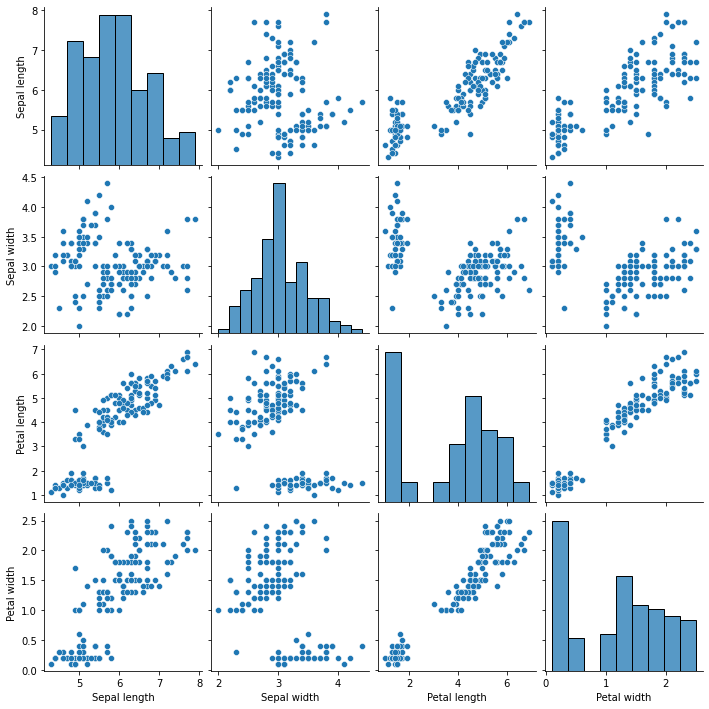

In [7]:
import seaborn as sns
sns.pairplot(iris_df)


**f)** [A matriz de covariância](https://support.minitab.com/pt-br/minitab/18/help-and-how-to/modeling-statistics/anova/supporting-topics/anova-statistics/what-is-the-variance-covariance-matrix/)


In [8]:
iris_df.cov()

,Sepal length,Sepal width,Petal length,Petal width
Sepal length,0.685694,-0.039268,1.273682,0.516904
Sepal width,-0.039268,0.188004,-0.321713,-0.117981
Petal length,1.273682,-0.321713,3.113179,1.296387
Petal width,0.516904,-0.117981,1.296387,0.582414


**g)** [A matriz de correlação](https://rstudio-pubs-static.s3.amazonaws.com/437792_df39a5ff0a55491fb71f0f4a0f5cd0bf.html)

In [9]:
iris_df.corr()

,Sepal length,Sepal width,Petal length,Petal width
Sepal length,1.000000,-0.109369,0.871754,0.817954
Sepal width,-0.109369,1.000000,-0.420516,-0.356544
Petal length,0.871754,-0.420516,1.000000,0.962757
Petal width,0.817954,-0.356544,0.962757,1.000000


**h)** As duas [componentes principais](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60) de maior magnitude dos dados:


In [10]:
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

features = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Separating out the features
x = iris_df.drop("Class",axis=1)

# Standardizing the features
x = pd.DataFrame(data = StandardScaler().fit_transform(x), columns= features)


x

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [11]:
#PCA projection on 2D
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf,iris_df[["Class"]]],axis=1)
finalDf

,principal component 1,principal component 2,Class
0,-2.264542,0.505704,setosa
1,-2.086426,-0.655405,setosa
2,-2.367950,-0.318477,setosa
3,-2.304197,-0.575368,setosa
4,-2.388777,0.674767,setosa
...,...,...,...
145,1.870522,0.382822,virginica
146,1.558492,-0.905314,virginica
147,1.520845,0.266795,virginica
148,1.376391,1.016362,virginica


**i)** A projeção dos dados nas duas maiores componentes principais

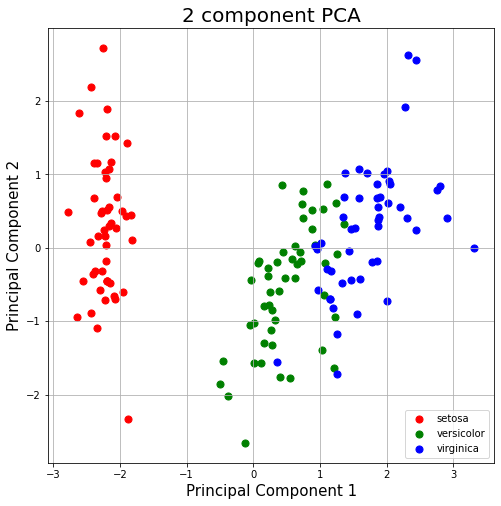

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = iris_df["Class"].unique()
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

**2)** Implemente o algoritmo do k-means na linguagem de programação de sua preferência e inicialize este algoritmo com k=3 centros:<br>

c1 = [5.1,3.5,1.4,0.2],<br>
c2 = [4.9,3.0,1.4,0.2],<br>
c3 = [4.7,3.2,1.3,0.2].<br>

In [13]:
from sklearn.cluster import KMeans


# Gathering Data
c1 = [5.1,3.5,1.4,0.2]
c2 = [4.9,3.0,1.4,0.2]
c3 = [4.7,3.2,1.3,0.2]

initial_centers = np.array([c1,c2,c3])
print(initial_centers)

data =  iris_df.drop("Class",axis=1)
kmeans3 = KMeans(n_clusters=3, init = initial_centers, n_init = 1)
y_kmeans3=kmeans3.fit_predict(data)
clusters_centers = kmeans3.cluster_centers_
print(clusters_centers)





[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.88360656 2.74098361 4.38852459 1.43442623]
 [5.006      3.418      1.464      0.244     ]]


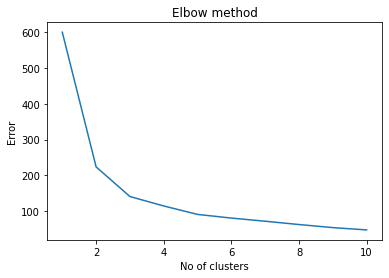

In [14]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

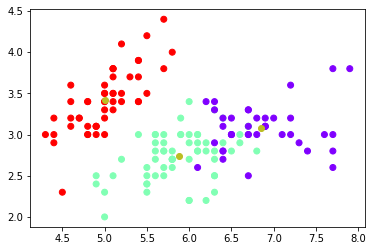

In [15]:
x = iris_df.iloc[:, [0,1,2,3]].values
plt.scatter(x[:,0],x[:,1], c=y_kmeans3, cmap = "rainbow")

plt.scatter(clusters_centers[:, 0], clusters_centers[:, 1], c='#bcbd22')

**a)** Após a convergência, qual o valor dos centros?

In [16]:
kmeans3.cluster_centers_

array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623],
       [5.006     , 3.418     , 1.464     , 0.244     ]])

**b)** Qual o centro mais próximo do centro da classe “Iris-setosa”

**c)** Qual o centro mais próximo do centro da classe “Iris-versicolor”

**d)** Qual o centro mais próximo do centro da classe “Iris-virginica”

**3)** Implemente o algoritmo do [KNN](https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/) na linguagem de programação de sua preferência

In [17]:
iris_df
data = iris_df.drop("Class",axis=1)
labels = iris_df["Class"]

from sklearn.model_selection import train_test_split

data_train, data_test,label_train, label_test = train_test_split(data, labels, test_size = 0.2, random_state=10)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data_train)

data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)


In [18]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(data_train, label_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
label_pred = classifier.predict(data_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(label_test, label_pred))
print(classification_report(label_test, label_pred))

[[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.92      0.96        13
   virginica       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

